In [1]:
from virusPropagationModel import *
import VPM_plotting as vpm_plot
%matplotlib inline
%load_ext autoreload
import glob
import os
import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
#%load_ext memory_profiler

In [2]:
geopath = 'datafiles/'
geofiles = {0:'Buildings_Gangelt_MA_1.csv',
            1:'Buildings_Gangelt_MA_3.csv',
           }         

# Initiate world

## Initiate a small version of the town Gangelt with 4 initially infected agents

In [3]:
world_to_pick = 1
n_initially_infected=4
modeledWorld_small = ModeledPopulatedWorld(1000,n_initially_infected, world_from_file=True, geofile_name=geopath+geofiles[world_to_pick], agent_agent_infection=True, input_schedules='schedules_v2')
n_people = modeledWorld_small.number_of_people
print('Number of agents: '+ str(n_people))

Number of agents: 1046


## Initiate the accurate version of the town Gangelt with n initially infected agents

In [ ]:
world_to_pick = 0
n_initially_infected=4
modeledWorld_large = ModeledPopulatedWorld(1000,n_initially_infected, world_from_file=True, geofile_name=geopath+geofiles[world_to_pick], agent_agent_infection=True, input_schedules='schedules_v2')
n_people = modeledWorld_large.number_of_people
print('Number of agents: '+ str(n_people))

# Info on world

### Plot histogram of age-distribution (blue) and ages of initially infected agents (red)

In [ ]:
modeledWorld_small.plot_initial_distribution_of_ages_and_infected(age_groups_step=10)

### Get tabular information on agent-population (Agent-ID, age, home-location/household, agent-/schedule type and interactivity)

In [ ]:
df_loc = modeledWorld_small.get_agent_info()
df_loc.head(4)

### Get tabular information on agent-population (Location-ID, location-type, area, coordinates ...)

In [ ]:
df_ag = modeledWorld_small.get_location_info()
df_ag.head(4)

### Get number of locations of different types as table

In [ ]:
modeledWorld_small.get_distribution_of_location_types()

### Plot the distribution of different agent-/schedule types and location-types (homes are ignored, due to large number and the mixing-location is only relevant for the homogeneous-mixing version of the model)

In [ ]:
modeledWorld_small.plot_locations_and_schedules(locs_to_hide=['home','mixing_loc'])

# Sample simulation

### Choose the world to simulate 

In [4]:
world_to_use=modeledWorld_small
#world_to_use=modeledWorld_large

### Define characteristics of the simulation to be performed
##### Number of timesteps in hours
##### Scaling factor for the general infectivity (default value = 0.3)
##### Scaling factor for the general interaction-frequency (default-value=2/h)

In [5]:
timesteps=168
general_infectivity=0.3
general_interaction_frequency=2

### Initiate simulation from world

In [6]:
simulation_default_infectivity = Simulation(copy.deepcopy(world_to_use),timesteps,run_immediately=False)

### Set agent infectivities to specified value and general interaction frequency to the specified value

In [7]:
simulation_default_infectivity.change_agent_attributes({'all':{'behaviour_as_infected':{'value':general_infectivity,'type':'replacement'}}})
simulation_default_infectivity.interaction_frequency=general_interaction_frequency

### Run simulation with specified characteristics

In [8]:
simulation_default_infectivity.simulate()

## Plotting simulation outcome

### Plot trajectories of agent-states and sub-states in the whole population

In [ ]:
simulation_default_infectivity.plot_status_timecourse()
simulation_default_infectivity.plot_flags_timecourse(specific_flags=['Diagnosed','WasDiagnosed','Hospitalized','WasHospitalized','ICUed','WasICUed'])

### Plot state-trajectories, resolved by age-cohort

In [ ]:
simulation_default_infectivity.plot_age_groups_status_timecourse()

### Plot heatmaps of age-specific interaction and infection-patterns

In [ ]:
simulation_default_infectivity.plot_interaction_patterns()
simulation_default_infectivity.plot_infection_patterns()

### Plot the relative over- and under-representation in the infection transmission of different location and agent types

In [ ]:
simulation_default_infectivity.plot_infections_per_schedule_type_delta(modeledWorld_small,relative=False, label_offset=0.04, title='all infections',save_figure=False)
simulation_default_infectivity.plot_infections_per_location_type_delta(modeledWorld_small,relative=False, label_offset=0.04,title='Infections per location-type',save_figure=False)

### Plot the distribution of average hourly total- and unique contacts per agent, over one week

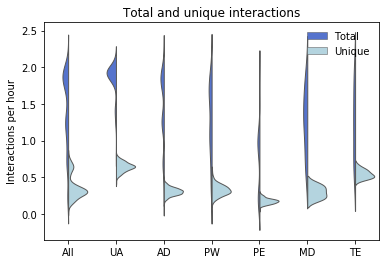

In [9]:
simulation_default_infectivity.plot_contact_distributions_as_violins(ScheduleType_name_map={'under_age': 'UA', 'adult': 'AD', 'pensioner': 'PE', 'public_worker': 'PW', 'teacher': 'TE', 'medical_professional': 'MD'})